In [1]:
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        swapped = False
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
                swapped = True
        if not swapped:
            break
    return arr

In [2]:
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)

In [3]:
import timeit
import random

def measure_time(algorithm, arr):
    start_time = timeit.default_timer()
    algorithm(arr)
    end_time = timeit.default_timer()
    return end_time - start_time

def average_time(algorithm, arr, num_runs=10):
    total_time = sum(measure_time(algorithm, arr.copy()) for _ in range(num_runs))
    return total_time / num_runs

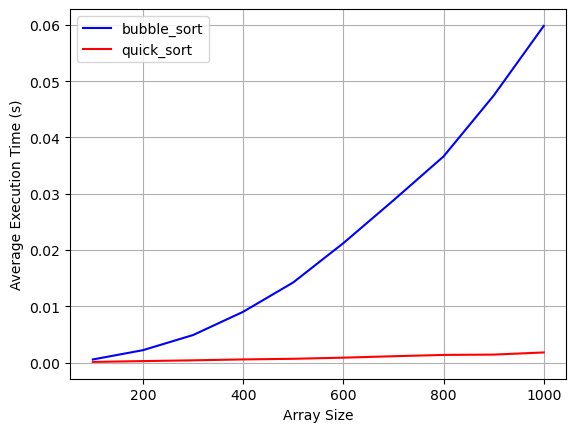

In [4]:
import matplotlib.pyplot as plt

def plot_complexity(algorithms, max_size=1000, step=100, num_runs=10):
    sizes = list(range(step, max_size + 1, step))
    for algorithm, color in algorithms.items():
        avg_times = []
        for size in sizes:
            arr = [random.randint(1, 10000) for _ in range(size)]
            avg_times.append(average_time(algorithm, arr, num_runs))
        plt.plot(sizes, avg_times, label=str(algorithm.__name__), color=color)
    
    plt.xlabel('Array Size')
    plt.ylabel('Average Execution Time (s)')
    plt.legend()
    plt.grid(True)
    plt.show()

# To plot the complexity:
algorithms = {bubble_sort: 'blue', quick_sort: 'red'}
plot_complexity(algorithms)
